In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
orvile_pmram_bangladeshi_brain_cancer_mri_dataset_path = kagglehub.dataset_download('orvile/pmram-bangladeshi-brain-cancer-mri-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
import os

print("Root:", orvile_pmram_bangladeshi_brain_cancer_mri_dataset_path)
print("\nContents:")
print(os.listdir(orvile_pmram_bangladeshi_brain_cancer_mri_dataset_path))


Root: /kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset

Contents:
['PMRAM Bangladeshi Brain Cancer - MRI Dataset', 'dataset.csv']


## Import Libraries

In [ ]:
from pathlib import Path

dataset_path = Path(orvile_pmram_bangladeshi_brain_cancer_mri_dataset_path)
print(dataset_path.exists())


True


In [ ]:
print(os.listdir(
    Path(orvile_pmram_bangladeshi_brain_cancer_mri_dataset_path) / "PMRAM Bangladeshi Brain Cancer - MRI Dataset"
))


['PMRAM Bangladeshi Brain Cancer - MRI Dataset']


In [ ]:
!pip install fastai scikit-learn matplotlib --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.0 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support


import warnings
warnings.filterwarnings ('ignore')

## Load Data

In [ ]:
from pathlib import Path

dataset_path = Path(orvile_pmram_bangladeshi_brain_cancer_mri_dataset_path) / "PMRAM Bangladeshi Brain Cancer - MRI Dataset" / "PMRAM Bangladeshi Brain Cancer - MRI Dataset" / "Augmented Data" / "Augmented"

dataset_path


Path('/kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Augmented Data/Augmented')

In [ ]:
files = list(dataset_path.glob("*/*.jpg"))
print(f'Total Images = {len(files)}')

Total Images = 6004


In [ ]:
dataset_path.ls()

(#4) [Path('/kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Augmented Data/Augmented/512Glioma'),Path('/kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Augmented Data/Augmented/512Meningioma'),Path('/kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Augmented Data/Augmented/512Pituitary'),Path('/kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Augmented Data/Augmented/512Normal')]

In [ ]:
dls = ImageDataLoaders.from_folder(
    dataset_path, valid_pct=0.2,
    item_tfms=Resize(224),
    batch_tfms=[
        *aug_transforms(flip_vert=True, max_rotate=30.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2),
    ]
)

In [ ]:
from fastai.losses import CrossEntropyLossFlat
from fastai.vision.all import vision_learner, resnet34, accuracy
from fastai.metrics import AccumMetric
from pathlib import Path

def multiclass_precision(preds, targs):
    if hasattr(preds, 'detach'):
        preds = preds.detach().cpu().numpy()
    if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
    if preds.ndim > 1:
        preds = preds.argmax(axis=1)
    return precision_score(targs, preds, average='macro')

def multiclass_recall(preds, targs):
    if hasattr(preds, 'detach'):
        preds = preds.detach().cpu().numpy()
    if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
    if preds.ndim > 1:
        preds = preds.argmax(axis=1)
    return recall_score(targs, preds, average='macro')

def multiclass_f1(preds, targs):
    if hasattr(preds, 'detach'):
        preds = preds.detach().cpu().numpy()
    if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
    if preds.ndim > 1:
        preds = preds.argmax(axis=1)
    return f1_score(targs, preds, average='macro')

precision_metric = AccumMetric(multiclass_precision)
recall_metric = AccumMetric(multiclass_recall)
f1_metric = AccumMetric(multiclass_f1)

learn = vision_learner(
    dls,
    resnet34,
    loss_func=CrossEntropyLossFlat(),
    metrics=[accuracy, precision_metric, recall_metric, f1_metric],
    model_dir=Path("/kaggle/working/models")
)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 179MB/s]


In [ ]:
len(dls.train_ds)

4804

In [ ]:
len(dls.valid_ds)

1200

In [ ]:
dls

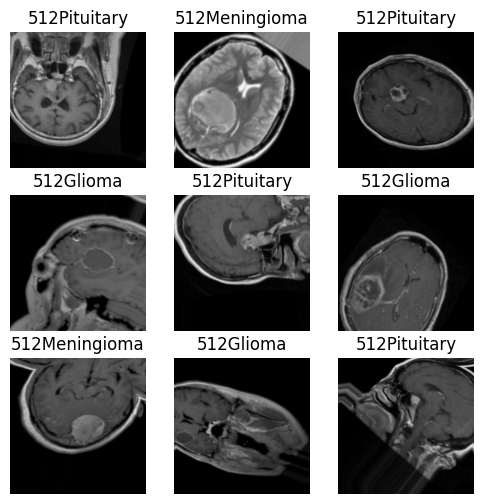

In [ ]:
dls.show_batch(max_n=9, figsize=(6,6))
plt.show()

## Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def multiclass_precision(preds, targs):
    # Eğer tensör ise, CPU'ya al ve numpy dizisine çevir
    if hasattr(preds, 'detach'):
        preds = preds.detach().cpu().numpy()
    if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
    # Eğer logits gibi çok boyutlu çıktı ise argmax al
    if preds.ndim > 1:
        preds = preds.argmax(axis=1)
    return precision_score(targs, preds, average='macro')

def multiclass_recall(preds, targs):
    if hasattr(preds, 'detach'):
        preds = preds.detach().cpu().numpy()
    if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
    if preds.ndim > 1:
        preds = preds.argmax(axis=1)
    return recall_score(targs, preds, average='macro')

def multiclass_f1(preds, targs):
    if hasattr(preds, 'detach'):
        preds = preds.detach().cpu().numpy()
    if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
    if preds.ndim > 1:
        preds = preds.argmax(axis=1)
    return f1_score(targs, preds, average='macro')


In [ ]:
learn = vision_learner(
    dls,
    resnet34,
    loss_func=CrossEntropyLossFlat(),
    metrics=[accuracy, multiclass_precision, multiclass_recall, multiclass_f1],
    model_dir=Path("/kaggle/working/models")
)

Suggested learning rates - minimum: 0.01000, steep: 0.00145


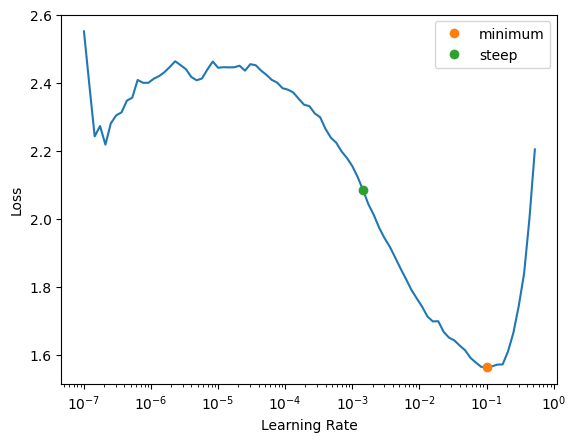

In [ ]:
#Find a good learning rate
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
print(f"Suggested learning rates - minimum: {lr_min:.5f}, steep: {lr_steep:.5f}")

In [ ]:
# Setup callbacks for early stopping and best model saving
early_stopping = EarlyStoppingCallback(monitor='valid_loss', patience=5)
save_best = SaveModelCallback(monitor='valid_loss', fname='best_model')


In [ ]:
# Train the model with 1-cycle policy and callbacks
learn.fit_one_cycle(10, lr_max=lr_min, cbs=[early_stopping, save_best])


epoch,train_loss,valid_loss,accuracy,multiclass_precision,multiclass_recall,multiclass_f1,time
0,0.727296,0.772905,0.815000,0.853633,0.814296,0.810481,00:38
1,0.419228,0.602909,0.826667,0.866035,0.824747,0.819663,00:37
2,0.325228,0.517281,0.869167,0.889243,0.869362,0.862093,00:37
3,0.214721,0.127957,0.956667,0.957569,0.956161,0.955052,00:38
4,0.204182,0.166093,0.948333,0.951838,0.947396,0.947076,00:36
5,0.153101,0.103630,0.966667,0.966021,0.966805,0.964922,00:37
6,0.104835,0.071919,0.974167,0.975429,0.974070,0.974132,00:36
7,0.071952,0.050999,0.980833,0.980104,0.978451,0.978647,00:37
8,0.062313,0.032501,0.989167,0.988352,0.988461,0.987922,00:38
9,0.049083,0.024495,0.990000,0.988959,0.989231,0.988628,00:37


Better model found at epoch 0 with valid_loss value: 0.7729053497314453.
Better model found at epoch 1 with valid_loss value: 0.6029090881347656.
Better model found at epoch 2 with valid_loss value: 0.5172811150550842.
Better model found at epoch 3 with valid_loss value: 0.12795661389827728.
Better model found at epoch 5 with valid_loss value: 0.1036304235458374.
Better model found at epoch 6 with valid_loss value: 0.07191857695579529.
Better model found at epoch 7 with valid_loss value: 0.05099894106388092.
Better model found at epoch 8 with valid_loss value: 0.03250079229474068.
Better model found at epoch 9 with valid_loss value: 0.024494823068380356.


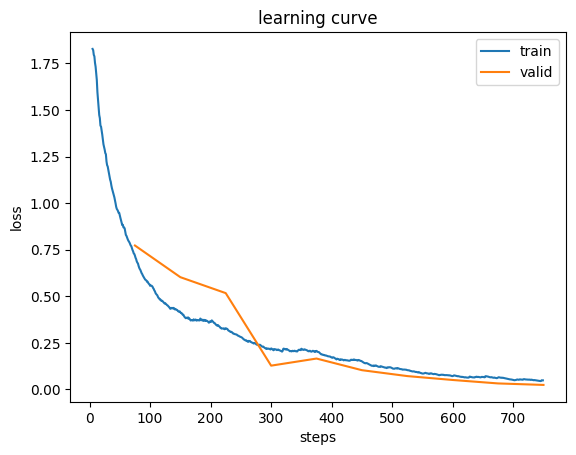

In [ ]:
#  Plot the training and validation losses
learn.recorder.plot_loss()
plt.show()


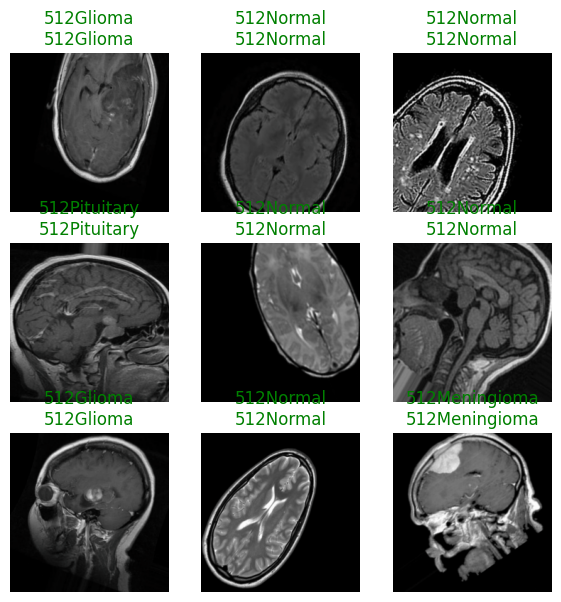

In [ ]:
#  Show some predictions on validation set
learn.show_results(max_n=9, figsize=(7,7))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

preds, targs = learn.get_preds()
pred_labels = preds.argmax(dim=1)
print(classification_report(targs, pred_labels, target_names=dls.vocab))


               precision    recall  f1-score   support

    512Glioma       0.99      0.98      0.99       310
512Meningioma       0.99      0.99      0.99       284
    512Normal       1.00      0.99      0.99       288
 512Pituitary       0.98      1.00      0.99       318

     accuracy                           0.99      1200
    macro avg       0.99      0.99      0.99      1200
 weighted avg       0.99      0.99      0.99      1200



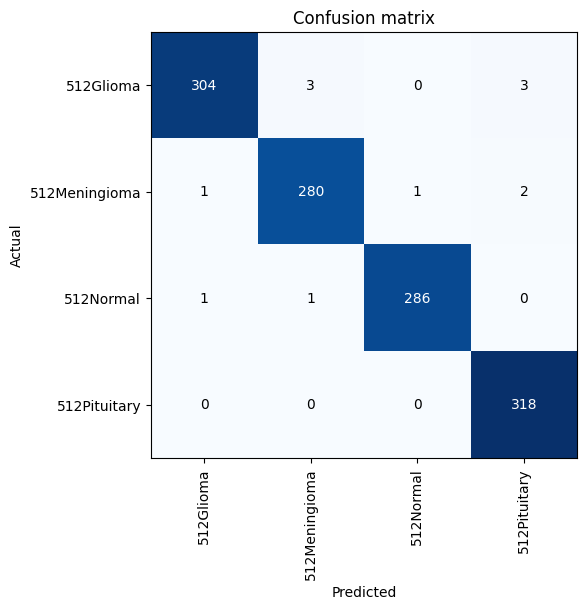

In [ ]:
# Plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))
plt.show()


In [ ]:
# Calculate precision, recall, F1 manually (weighted average)
from fastai.metrics import accuracy
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(targs, pred_labels, average='weighted')
acc = accuracy(preds, targs).item()  # Convert tensor to float

print(f"Validation Accuracy: {acc:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")


Validation Accuracy: 0.9900
Weighted Precision: 0.9900
Weighted Recall: 0.9900
Weighted F1 Score: 0.9900


## Model

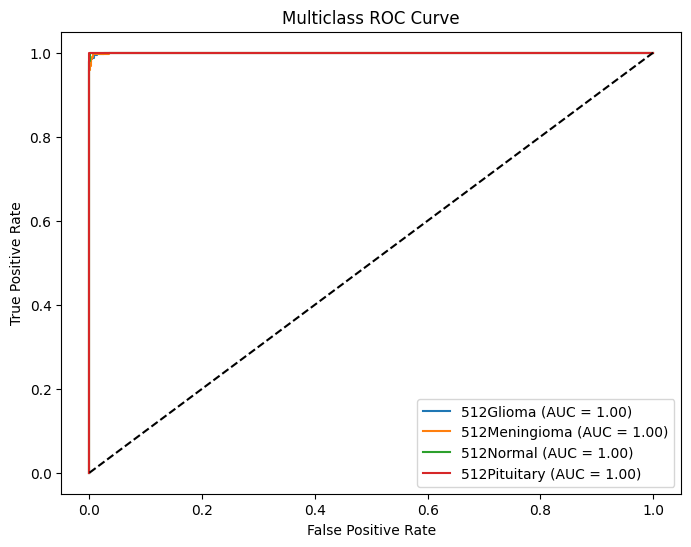

In [ ]:
# Plot ROC curves for multiclass
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

probs = preds.softmax(dim=1).cpu().numpy()
targs_bin = label_binarize(targs.cpu().numpy(), classes=range(len(dls.vocab)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(dls.vocab)):
    fpr[i], tpr[i], _ = roc_curve(targs_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(len(dls.vocab)):
    plt.plot(fpr[i], tpr[i], label=f"{dls.vocab[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.show()


In [ ]:
learn.export("/kaggle/working/model.pkl")

In [ ]:
# (Optional) Load exported model and do inference on a single image
learn_inf = load_learner("/kaggle/working/model.pkl")
img = PILImage.create("/kaggle/input/pmram-bangladeshi-brain-cancer-mri-dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/PMRAM Bangladeshi Brain Cancer - MRI Dataset/Augmented Data/Augmented/512Normal/normal_0_3012.jpg")
pred, pred_idx, probs = learn_inf.predict(img)
print(f"Prediction: {pred}, Probability: {probs[pred_idx]:.4f}")


Prediction: 512Normal, Probability: 1.0000


In [ ]:
from google.colab import files
files.download("/kaggle/working/model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Referances

* https://www.fast.ai/
* https://github.com/fastai
* https://docs.fast.ai
* https://www.kaggle.com/code/alkidiarete/fruit-classification-with-fast-ai